# Bootstrapping

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

coffee_rating  = pd.read_feather('datasets/coffee_ratings_full (1).feather')


#### What is Bootstraping
The opposite of sampling from a population

*Sampling* going from a population to a smaller sample  

*Bootstraping* building up a theoretical population from the sample

Boostraping use case:  
    - Develop understanding of sampling variability using a single sample


##### Bootstrapping process
1. Make a resample of the same size as the original sample
2. Calculate the statistics of interest for this bootstrap sample
3. Repeat steps 1 and 2 many times

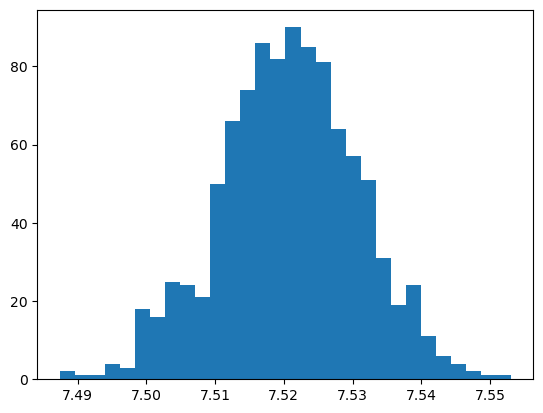

In [6]:
from numpy import mean


coffee_sample = coffee_rating.sample(1000)

mean_flavors_1000 = []

for i in range(1000):
    mean_flavors_1000.append(
        np.mean(coffee_sample.sample(frac = 1, replace = True)['flavor'])
    )

plt.hist(mean_flavors_1000, bins = 30)
plt.show()